In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter('ignore')



In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv("/content/drive/My Drive/PNAD_COVID_112020.csv")

In [30]:
df

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11.0,NaN,1,4,11,7,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
1,2020,11,11.0,NaN,1,4,11,7,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
2,2020,11,11.0,NaN,1,4,11,7,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
3,2020,11,11.0,NaN,1,4,11,7,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
4,2020,11,11.0,NaN,2,1,11,7,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381433,2020,53,53.0,NaN,6,3,11,7,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
381434,2020,53,53.0,NaN,6,3,11,7,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
381435,2020,53,53.0,NaN,6,3,11,7,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
381436,2020,53,53.0,NaN,10,2,11,7,5310220,530009738,...,5,NaN,NaN,1,1,1,1,1,1,2.0


In [31]:
cols = ['V1022', 'A002', 'B00111', 'B009D', 'B009B', 'B009F', 'D0031', 'D0051']
df = df[cols]

In [32]:
conditions = [df['B009D'].eq(1) | df['B009B'].eq(1) | df['B009F'].eq(1)]

choices = [True]

df['Infectado'] = np.select(conditions, choices, default=False)

In [33]:
df['Infectado'].value_counts()

False    368986
True      12452
Name: Infectado, dtype: int64

In [34]:
df["B009D"].fillna('False', inplace=True)

In [35]:
cols = ['V1022', 'A002', 'B00111', 'Infectado', 'D0031', 'D0051']
df = df[cols]

In [36]:
df.isnull().sum()

V1022        0
A002         0
B00111       0
Infectado    0
D0031        0
D0051        0
dtype: int64

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Infectado'])
df['Infectado'] = le.transform(df['Infectado'])

### **STARTING EDA** ✅








In [38]:
df.describe()

,V1022,A002,B00111,Infectado,D0031,D0051
count,381438.000000,381438.000000,381438.000000,381438.000000,381438.000000,381438.000000
mean,1.236712,37.070987,2.021697,0.032645,1.903701,1.515604
std,0.425065,21.849886,0.422691,0.177706,0.295001,0.499757
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,18.000000,2.000000,0.000000,2.000000,1.000000
50%,1.000000,36.000000,2.000000,0.000000,2.000000,2.000000
75%,1.000000,54.000000,2.000000,0.000000,2.000000,2.000000
max,2.000000,111.000000,9.000000,1.000000,2.000000,2.000000


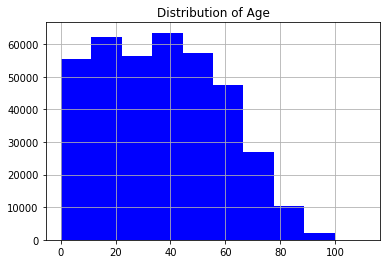

In [39]:
#Distribuição por idade
df.A002.hist(bins=10,color='blue')
plt.title('Distribution of Age')
plt.figsize=(10, 10)
plt.show()


In [40]:
infec = df.Infectado.value_counts()
import plotly.express as px
fig = px.pie(infec, values=infec, names=infec.index, title='Pessoas que testaram positivo')
fig.show()

In [41]:
domicilio = df.V1022.value_counts()
import plotly.express as px
fig = px.pie(domicilio, values=domicilio, names=['Urbano', 'Rural'], title='Local de Residência', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [42]:
paladar = df.B00111.value_counts()
import plotly.express as px
fig = px.pie(paladar, values=paladar, names=['Não', 'Sim', 'Não sabe dizer', 'Não respondeu'], title='Teve perda de Olfato/paladar?', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

No handles with labels found to put in legend.


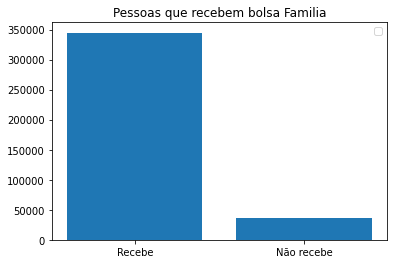

In [43]:
BF = df.D0031.value_counts()
names = ['Recebe', 'Não recebe']
plt.figsize=(10, 10)
plt.bar(names, BF)
plt.title('Pessoas que recebem bolsa Familia')
plt.legend(loc='best')



In [44]:
aux = df.D0051.value_counts()
import plotly.express as px
fig = px.pie(aux, values=aux, names=['Não recebeu o Auxílio', 'Recebeu o auxílio'], title='Recebeu Auxílio Emergencial?', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

***MODELANDO OS DADOS***

1- DIVISÃO DA AMOSTRA (SPLIT) ➗

2- DECISION TREE 🌳

3- RANDOM FOREST 🌳 🌳

4- XGBOOST ⚡


In [45]:
#Ponto de partida é dividir a amostra em X e y e posteriormente em amostra de treino e teste

#Optei por utilizar 0,25 da amostra para teste

#Por ser cross-Section os dados foram obtidos aleatóriamente


y = df['Infectado']
X =df[['V1022', 'A002', 'B00111', 'D0031', 'D0051']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***1º MODELO - ARVORE DE DECISÃO CLASSIFIER***  🌳

obs - Como a a variável dependente é não booleana, não podemos utilizar o modelo de regressão.

In [46]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

score_tree = accuracy_score(y_test, pred)
score_tree

0.9670931208053691

***2º MODELO - ARVORE DE DECISÃO RANDOM CLASSIFIER*** 🌳🌳🌳



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=50,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model_Random= rf.fit(X_train, y_train)

pred_Random = model_Random.predict(X_test)

Random_score_tree = accuracy_score(y_test, pred_Random)

Random_score_tree

0.9671770134228188

***3º MODELO - XGBOOST ⚡***

In [49]:
import xgboost as xgb
model_Boost = xgb.XGBClassifier()
model_Boost.fit(X_train, y_train)
   
# Predicting the Test set results
pred_Boost = model_Boost.predict(X_test)

Boost_score_tree = accuracy_score(y_test, pred_Boost)

Boost_score_tree

0.9672923657718121

***O MODELO XGBOOST FOI O MAIS EFICIENTE E APRESENTOU UM RESULTADO LEVEMENTE SUPERIOR AOS DEMAIS.***